In [1]:
import nltk
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

In [2]:
import numpy as np
import json 
import random
import matplotlib.pyplot as plt
import pickle 

In [4]:

import tensorflow as tf 
from tensorflow import keras

In [5]:
with open("intents.json") as file:
    data = json.load(file)

In [6]:
try:
    with open("data.pickle","rb") as f:
        words,labels,training,output = pickle.load(f)
    

except:
    words = []
    labels = []
    docs_x = []
    docs_y = []
    for intent in data["intents"]:
        for pattern in intent["patterns"]:
            print(pattern)
            wrds = nltk.word_tokenize(pattern)
            words.extend(wrds)
            docs_x.append(wrds)
            docs_y.append(intent["tag"])
        if intent["tag"] not in labels:
            labels.append(intent["tag"])


    words = [stemmer.stem(w.lower())for w in words if w not in "?"]
    words = sorted(list(set(words)))
    labels = sorted(labels)
    training = []
    output = []
    out_empty = [0 for _ in range(len(labels))]

    for x,doc in enumerate(docs_x):
        bag = []
        wrds = [stemmer.stem(w) for w in doc ]#wrds is list have the infetive words
        for w in words :
            if w in wrds:
                bag.append(1)
            else:
                bag.append(0)


        out_put_row = out_empty[:]
        out_put_row[labels.index(docs_y[x])] = 1

        training.append(bag)
        output.append(out_put_row)

    training = np.array(training)
    output = np.array(output)
    
    with open("data.pickle","wb") as f:
        pickle.dump((words,labels,training,output),f) 
    
    

    

In [263]:

#training = []
#output = []
#out_empty = [0 for _ in range(len(labels))]

#for x,doc in enumerate(docs_x):
    #bag = []
    #wrds = [stemmer.stem(w) for w in doc ]#wrds is list have the infetive words
    #for w in words :
        #if w in wrds:
            #bag.append(1)
        #else:
            #bag.append(0)
    
    
    #out_put_row = out_empty[:]
    #out_put_row[labels.index(docs_y[x])] = 1
    
   # training.append(bag)
   # output.append(out_put_row)
    
#training = np.array(training)
#output = np.array(output)
    

In [7]:
tf.reset_default_graph()
import keras
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [8]:
model = Sequential()
model.add(Dense(8, input_dim= 54))
model.add(Dense(8))
model.add(Dense(len(output[0]), activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(training, output, epochs=200, batch_size=8)


Epoch 1/200
37/37 [==============================] - 1s 19ms/step - loss: 2.2269 - accuracy: 0.1081
Epoch 2/200
37/37 [==============================] - 0s 304us/step - loss: 2.2064 - accuracy: 0.1081
Epoch 3/200
37/37 [==============================] - 0s 464us/step - loss: 2.1861 - accuracy: 0.1351
Epoch 4/200
37/37 [==============================] - 0s 418us/step - loss: 2.1688 - accuracy: 0.1351
Epoch 5/200
37/37 [==============================] - 0s 318us/step - loss: 2.1511 - accuracy: 0.1351
Epoch 6/200
37/37 [==============================] - 0s 449us/step - loss: 2.1331 - accuracy: 0.1351
Epoch 7/200
37/37 [==============================] - 0s 437us/step - loss: 2.1167 - accuracy: 0.1622
Epoch 8/200
37/37 [==============================] - 0s 309us/step - loss: 2.0997 - accuracy: 0.1892
Epoch 9/200
37/37 [==============================] - 0s 501us/step - loss: 2.0819 - accuracy: 0.1892
Epoch 10/200
37/37 [==============================] - 0s 258us/step - loss: 2.0654 - accura

37/37 [==============================] - 0s 255us/step - loss: 0.0915 - accuracy: 1.0000
Epoch 159/200
37/37 [==============================] - 0s 284us/step - loss: 0.0895 - accuracy: 1.0000
Epoch 160/200
37/37 [==============================] - 0s 280us/step - loss: 0.0875 - accuracy: 1.0000
Epoch 161/200
37/37 [==============================] - 0s 330us/step - loss: 0.0856 - accuracy: 1.0000
Epoch 162/200
37/37 [==============================] - 0s 293us/step - loss: 0.0839 - accuracy: 1.0000
Epoch 163/200
37/37 [==============================] - 0s 255us/step - loss: 0.0820 - accuracy: 1.0000
Epoch 164/200
37/37 [==============================] - 0s 257us/step - loss: 0.0805 - accuracy: 1.0000
Epoch 165/200
37/37 [==============================] - 0s 258us/step - loss: 0.0787 - accuracy: 1.0000
Epoch 166/200
37/37 [==============================] - 0s 284us/step - loss: 0.0772 - accuracy: 1.0000
Epoch 167/200
37/37 [==============================] - 0s 241us/step - loss: 0.0755 - a

Text(0.5, 0, 'epoch')

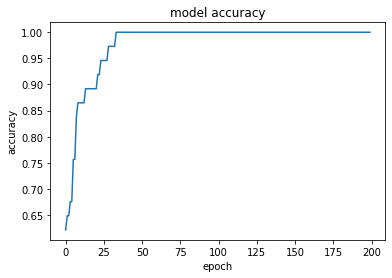

In [82]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

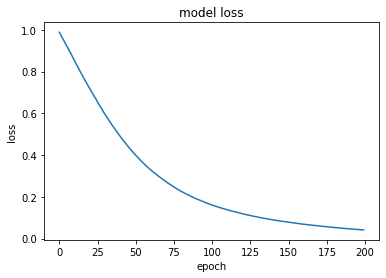

In [83]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [11]:
try:
    model.load("model.h5")
except:    
    model.fit(training, output, epochs=201, batch_size=8)
    model.save_weights("model.h5")

Epoch 1/201
37/37 [==============================] - 0s 297us/step - loss: 0.0406 - accuracy: 1.0000
Epoch 2/201
37/37 [==============================] - 0s 261us/step - loss: 0.0398 - accuracy: 1.0000
Epoch 3/201
37/37 [==============================] - 0s 257us/step - loss: 0.0393 - accuracy: 1.0000
Epoch 4/201
37/37 [==============================] - 0s 487us/step - loss: 0.0386 - accuracy: 1.0000
Epoch 5/201
37/37 [==============================] - 0s 588us/step - loss: 0.0380 - accuracy: 1.0000
Epoch 6/201
37/37 [==============================] - 0s 476us/step - loss: 0.0374 - accuracy: 1.0000
Epoch 7/201
37/37 [==============================] - 0s 333us/step - loss: 0.0368 - accuracy: 1.0000
Epoch 8/201
37/37 [==============================] - 0s 286us/step - loss: 0.0362 - accuracy: 1.0000
Epoch 9/201
37/37 [==============================] - 0s 509us/step - loss: 0.0356 - accuracy: 1.0000
Epoch 10/201
37/37 [==============================] - 0s 506us/step - loss: 0.0351 - accura

37/37 [==============================] - 0s 242us/step - loss: 0.0070 - accuracy: 1.0000
Epoch 161/201
37/37 [==============================] - 0s 282us/step - loss: 0.0070 - accuracy: 1.0000
Epoch 162/201
37/37 [==============================] - 0s 247us/step - loss: 0.0069 - accuracy: 1.0000
Epoch 163/201
37/37 [==============================] - 0s 339us/step - loss: 0.0069 - accuracy: 1.0000
Epoch 164/201
37/37 [==============================] - 0s 223us/step - loss: 0.0068 - accuracy: 1.0000
Epoch 165/201
37/37 [==============================] - 0s 406us/step - loss: 0.0068 - accuracy: 1.0000
Epoch 166/201
37/37 [==============================] - 0s 281us/step - loss: 0.0067 - accuracy: 1.0000
Epoch 167/201
37/37 [==============================] - 0s 205us/step - loss: 0.0067 - accuracy: 1.0000
Epoch 168/201
37/37 [==============================] - 0s 243us/step - loss: 0.0066 - accuracy: 1.0000
Epoch 169/201
37/37 [==============================] - 0s 342us/step - loss: 0.0066 - a

In [12]:
def bag_of_words(s,words):
    bag = [0 for _ in range(len(words))]
    s_words = nltk.word_tokenize(s)
    s_words = [stemmer.stem(word.lower()) for word in s_words]
    for se in s_words:
        for i,w in enumerate(words):
            if w == se:
                bag[i]=(1)
    
    return np.array(bag)

In [13]:
def chat():
    print("start talking with the bot (type quit to stop) ")
    while True:
        inp = input("you: ")
        if inp.lower()=="quit":
            break
        results = model.predict([[bag_of_words(inp,words)]])
        print(results)
        results_index = np.argmax(results)
        print(results_index)
        tag = labels[results_index]
        for tg in data["intents"]:
            if tg['tag'] == tag:
                responses = tg['responses']
        print(random.choice(responses))

In [14]:
chat()

start talking with the bot (type quit to stop) 
you: hi
[[5.2026863e-04 7.3989382e-04 2.9066361e-05 1.6028411e-05 9.9726909e-01
  3.6024174e-04 9.9132078e-05 3.4286355e-04 6.2344177e-04]]
4
Good to see you again!
you: quit


In [28]:
model.save('newmodel.h5')

In [1]:
from flask import Flask,jsonify,request
from flask_cors import CORS 

In [4]:
app = Flask(__name__)
CORS(app)

@app.route('/',methods=['POST'])
def index():
    user_input = request.json['msg']
    
    return jsonify({'msg':str(dialog(user_input))})

if __name__ == '__main__':
    app.run(host='127.0.0.1',port=8080,debug=True)  

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: [Errno 98] Address already in use

In [3]:
%tb

SystemExit: 1